In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split,cross_val_score , ShuffleSplit , GridSearchCV
from sklearn.linear_model import LinearRegression , Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score , r2_score

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv",nrows=100)
df.head()

,size,total_sqft,bath,balcony,price
0,2 BHK,1056,2.0,1.0,39.07
1,4 Bedroom,2600,5.0,3.0,120.00
2,3 BHK,1440,2.0,3.0,62.00
3,3 BHK,1521,3.0,1.0,95.00
4,2 BHK,1200,2.0,1.0,51.00


In [3]:
df.columns

Index(['size', 'total_sqft', 'bath', 'balcony', 'price'], dtype='object')

In [4]:
df.isnull().sum()

size          0
total_sqft    0
bath          2
balcony       8
price         0
dtype: int64

In [5]:
df.describe()

,bath,balcony,price
count,98.000000,92.000000,100.000000
mean,2.816327,1.608696,108.192900
std,1.508375,0.838058,104.771216
min,1.000000,0.000000,15.000000
25%,2.000000,1.000000,47.750000
50%,2.000000,2.000000,74.250000
75%,3.000000,2.000000,125.000000
max,9.000000,3.000000,650.000000


# Data Cleaning


In [6]:
df['size'].dtype,df.total_sqft.dtype , df.bath.dtype,df.balcony.dtype, df.price.dtype

(dtype('O'), dtype('O'), dtype('float64'), dtype('float64'), dtype('float64'))

# 

In [7]:
df["size"].isnull().sum()

0

In [8]:
df['size'].dtype
#Will change size column datatype object to int

dtype('O')

In [9]:
size=[]
for i in range(df["size"].shape[0]):
    s=(df["size"][i]).split(" ")
    size.append(int(s[0]))

In [10]:
for i in size:
    print(i,end = " ")

2 4 3 3 2 2 4 4 3 6 3 4 2 2 3 2 3 3 3 2 1 3 4 3 1 3 2 3 2 3 4 3 3 3 3 2 2 3 3 2 2 3 1 1 2 8 2 2 2 2 2 3 3 2 3 2 4 2 6 2 3 2 4 2 8 2 2 2 8 2 3 2 3 2 3 2 2 3 2 6 3 4 2 3 3 6 3 2 2 6 2 2 3 4 2 3 4 3 2 3 

In [11]:
df["size"] = size

In [12]:
df['size'].dtype
#Datatype has been changed

dtype('int64')

In [13]:
df.describe()

,size,bath,balcony,price
count,100.000000,98.000000,92.000000,100.000000
mean,2.920000,2.816327,1.608696,108.192900
std,1.375691,1.508375,0.838058,104.771216
min,1.000000,1.000000,0.000000,15.000000
25%,2.000000,2.000000,1.000000,47.750000
50%,3.000000,2.000000,2.000000,74.250000
75%,3.000000,3.000000,2.000000,125.000000
max,8.000000,9.000000,3.000000,650.000000


In [14]:
df['size'].dtype,df.total_sqft.dtype , df.bath.dtype,df.balcony.dtype, df.price.dtype

(dtype('int64'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'))

In [15]:
#Now it's time to clean bath column and make the col datatype int

In [16]:
for i in df.bath:
    print(i,end=" ")

2.0 5.0 2.0 3.0 2.0 2.0 4.0 4.0 3.0 6.0 2.0 5.0 2.0 2.0 3.0 2.0 3.0 3.0 4.0 2.0 1.0 3.0 5.0 3.0 1.0 3.0 1.0 3.0 2.0 2.0 4.0 2.0 2.0 3.0 3.0 2.0 2.0 3.0 2.0 2.0 2.0 3.0 1.0 1.0 2.0 9.0 2.0 2.0 1.0 2.0 2.0 3.0 3.0 2.0 2.0 2.0 nan 2.0 4.0 2.0 3.0 2.0 5.0 2.0 8.0 2.0 2.0 2.0 7.0 2.0 3.0 2.0 3.0 2.0 3.0 2.0 2.0 3.0 1.0 6.0 2.0 nan 2.0 2.0 5.0 7.0 3.0 2.0 2.0 6.0 2.0 2.0 2.0 4.0 2.0 3.0 4.0 2.0 2.0 3.0 

In [17]:
df.bath.dtype

dtype('float64')

In [18]:
df.bath.isnull().sum()

2

In [19]:
df.bath.fillna(method = "pad",inplace = True)

In [20]:
df.bath.isnull().sum()

0

In [21]:
Bath=[]
for i in range(df["bath"].shape[0]):
    Bath.append(int(df["bath"][i]))

In [22]:
df.bath.dtype

dtype('float64')

In [23]:
df.bath = Bath

In [24]:
df.bath.dtype

dtype('int64')

In [25]:
df["bath"].shape

(100,)

In [26]:
#Doing data cleaning into balcony

In [27]:
df.balcony.dtype

dtype('float64')

In [28]:
df.balcony.isnull().sum()

8

In [29]:
df.balcony.fillna(method = 'pad',inplace = True)

In [30]:
df.balcony.isnull().sum()

0

In [31]:
df.balcony.unique

<bound method Series.unique of 0     1.0
1     3.0
2     3.0
3     1.0
4     1.0
     ... 
95    2.0
96    1.0
97    1.0
98    1.0
99    1.0
Name: balcony, Length: 100, dtype: float64>

In [32]:
Balcony = []
for i in range(df.balcony.shape[0]):
    Balcony.append(int(df.balcony[i]))

In [33]:
for i in Balcony:
    print(i,end=" ")

1 3 3 1 1 1 1 1 1 1 2 3 1 2 2 2 2 3 2 2 1 1 2 1 0 2 1 2 2 1 0 1 2 3 3 1 1 2 2 2 2 2 0 0 2 2 0 1 1 1 1 1 2 2 3 2 2 2 1 2 2 1 3 2 0 1 3 1 0 1 2 1 1 1 2 1 3 3 0 3 2 2 2 2 2 2 2 2 2 3 2 1 2 2 3 2 1 1 1 1 

In [34]:
df.balcony = Balcony

In [35]:
df.balcony.dtype

dtype('int64')

# Cleaning Sqft column

In [36]:
def convert_sqrt_to_num(x):
    tokens = str(x).split("-")
    if len(tokens) == 2:
        return int(float(tokens[0])+float(tokens[1]))/2
    try:
        return int(x)
    except:
        return 100
    

In [37]:
sqft=[]
for i in df.total_sqft:
    sqft.append(convert_sqrt_to_num(i))
print(sqft)

[1056, 2600, 1440, 1521, 1200, 1170, 2732, 3300, 1310, 1020, 1800, 2785, 1000, 1100, 2250, 1175, 1180, 1540, 2770, 1100, 600, 1755, 2800, 1767, 510, 1250, 660, 1610, 1151, 1025, 2475.0, 1075, 1760, 1693, 1925, 700, 1070, 1724, 1290, 1143, 1296, 1254, 600, 660, 100, 600, 970, 1459, 800, 869, 1270, 1670, 2010, 1185, 1600, 1200, 3210.0, 1500, 1407, 840, 4395, 845, 5700, 1160, 3000, 1100, 1140, 1220, 1350, 1005, 500, 1358, 1569, 1240, 2089, 1206, 1150, 2511, 460, 4400, 1660, 3203.5, 1326, 1325, 1499, 3000, 1665, 708, 1060, 710, 1000, 1000, 1450, 1200, 1296, 1540, 2894, 1330, 1200, 1200]


In [38]:
print(len(sqft))

100


In [39]:
df.total_sqft = sqft

In [40]:
df.total_sqft.dtype

dtype('float64')

In [41]:
df.total_sqft.isnull().sum()

0

In [42]:
df['size'].dtype,df.total_sqft.dtype , df.bath.dtype,df.balcony.dtype, df.price.dtype

(dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'))

In [43]:
df.head()

,size,total_sqft,bath,balcony,price
0,2,1056.0,2,1,39.07
1,4,2600.0,5,3,120.00
2,3,1440.0,2,3,62.00
3,3,1521.0,3,1,95.00
4,2,1200.0,2,1,51.00


In [44]:
df.isnull().sum()

size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [45]:
df.total_sqft.dtype

dtype('float64')

In [46]:
df['size'].dtype,df.total_sqft.dtype , df.bath.dtype,df.balcony.dtype, df.price.dtype

(dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'))

## Spitting the dataset for training and testing part in 80:20 ratio 

In [47]:
Y = df.price
X = df.drop(["price"],axis=1)

In [48]:
x_train , x_test , y_train , y_test = train_test_split(X, Y,test_size = 0.2,random_state = 2) 

In [49]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((80, 4), (20, 4), (80,), (20,))

In [50]:
#Checking whether is any null value or not
print("X_train:-\n",x_train.isnull().sum()) 
print("X_test:-\n",x_test.isnull().sum())
print("Y_train:-\n",y_train.isnull().sum())
print("Y_test:-\n",y_test.isnull().sum())

X_train:-
 size          0
total_sqft    0
bath          0
balcony       0
dtype: int64
X_test:-
 size          0
total_sqft    0
bath          0
balcony       0
dtype: int64
Y_train:-
 0
Y_test:-
 0


In [51]:
df['size'].dtype,df.total_sqft.dtype , df.bath.dtype,df.balcony.dtype, df.price.dtype

(dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'))

In [52]:
model = LinearRegression()

In [53]:
model.fit(X, Y)

LinearRegression()

In [54]:
model.score(x_test , y_test)

0.6816830020562703

In [55]:
model.predict([[2,1056,2,1]])

array([62.15277551])

In [56]:
model.intercept_

-46.65183658962967

In [57]:
model.coef_

array([-11.45059579,   0.07687082,  27.52406899,  -4.51792071])

In [58]:
value = -11.45059579*2 + 1056*0.07687082 + 2*27.52406899 + 1*-4.51792071 + model.intercept_
value

62.15277502037033

In [59]:
Cv = ShuffleSplit( n_splits=5,test_size=.2,random_state=1)

cross_val_score(LinearRegression(),X, Y , cv = Cv)

array([ 0.29336337,  0.62604637,  0.42270832,  0.53095246, -0.44591654])

In [60]:
def find_best_model_using_gridsearchcv(X , y):
    algos = {
        "linear_regression" : {
            "model": LinearRegression() , 
            "params" :{
                "normalize" : [True , False]
            }
    } , 
    "lasso" : {
        "model": Lasso(),
        "params":{
            "alpha":[1,2],
            "selection" : [ "random","cyclic"]
        }
    } ,
        
    "decision_tree":{
        "model": DecisionTreeRegressor(),
        "params" : {
            "criterion": ["mse","friedman_mse"],
            "splitter" : ["best","random"]
            }
        }    
    }
    
    scores=[]
    cv = ShuffleSplit(n_splits=10, test_size=0.2,random_state=0)
    for algo_name , config in algos.items():
        gs = GridSearchCV(config["model"] , config["params"] , cv = Cv , return_train_score=False )
        gs.fit(X , y)
        scores.append({
            "model" : algo_name,
            "best_score":gs.best_score_ , 
            "best_params": gs.best_params_
        })
        
        print("model" , algo_name,"best_score",gs.best_score_ , "best_params" , gs.best_params_)

    return pd.DataFrame(scores , columns=["model" , "best_score" , " best_params"])

In [61]:
find_best_model_using_gridsearchcv(X ,Y)

model linear_regression best_score 0.2854307959257445 best_params {'normalize': True}
model lasso best_score 0.3026383974081626 best_params {'alpha': 2, 'selection': 'random'}
model decision_tree best_score 0.1376564585235061 best_params {'criterion': 'friedman_mse', 'splitter': 'best'}


,model,best_score,best_params
0,linear_regression,0.285431,NaN
1,lasso,0.302638,NaN
2,decision_tree,0.137656,NaN


In [62]:
FinalModel = DecisionTreeRegressor(splitter = 'random' ,random_state =19)

In [63]:
FinalModel.fit(x_train , y_train)

DecisionTreeRegressor(random_state=19, splitter='random')

In [64]:
y_pred = FinalModel.predict(x_test)
y_pred

array([ 48. , 204. , 224.5,  38. ,  56. , 123. ,  48. ,  88. ,  44. ,
        48. ,  56. ,  48. ,  43. , 205. ,  45.5, 123. , 101. ,  35. ,
        36. , 240. ])

In [65]:
FinalModel.score(x_test , y_test)

0.8849182759265796

In [66]:
r2_score(y_test , y_pred)

0.8849182759265796

# Ploting DT


In [72]:
import graphviz
from sklearn.tree import export_graphviz

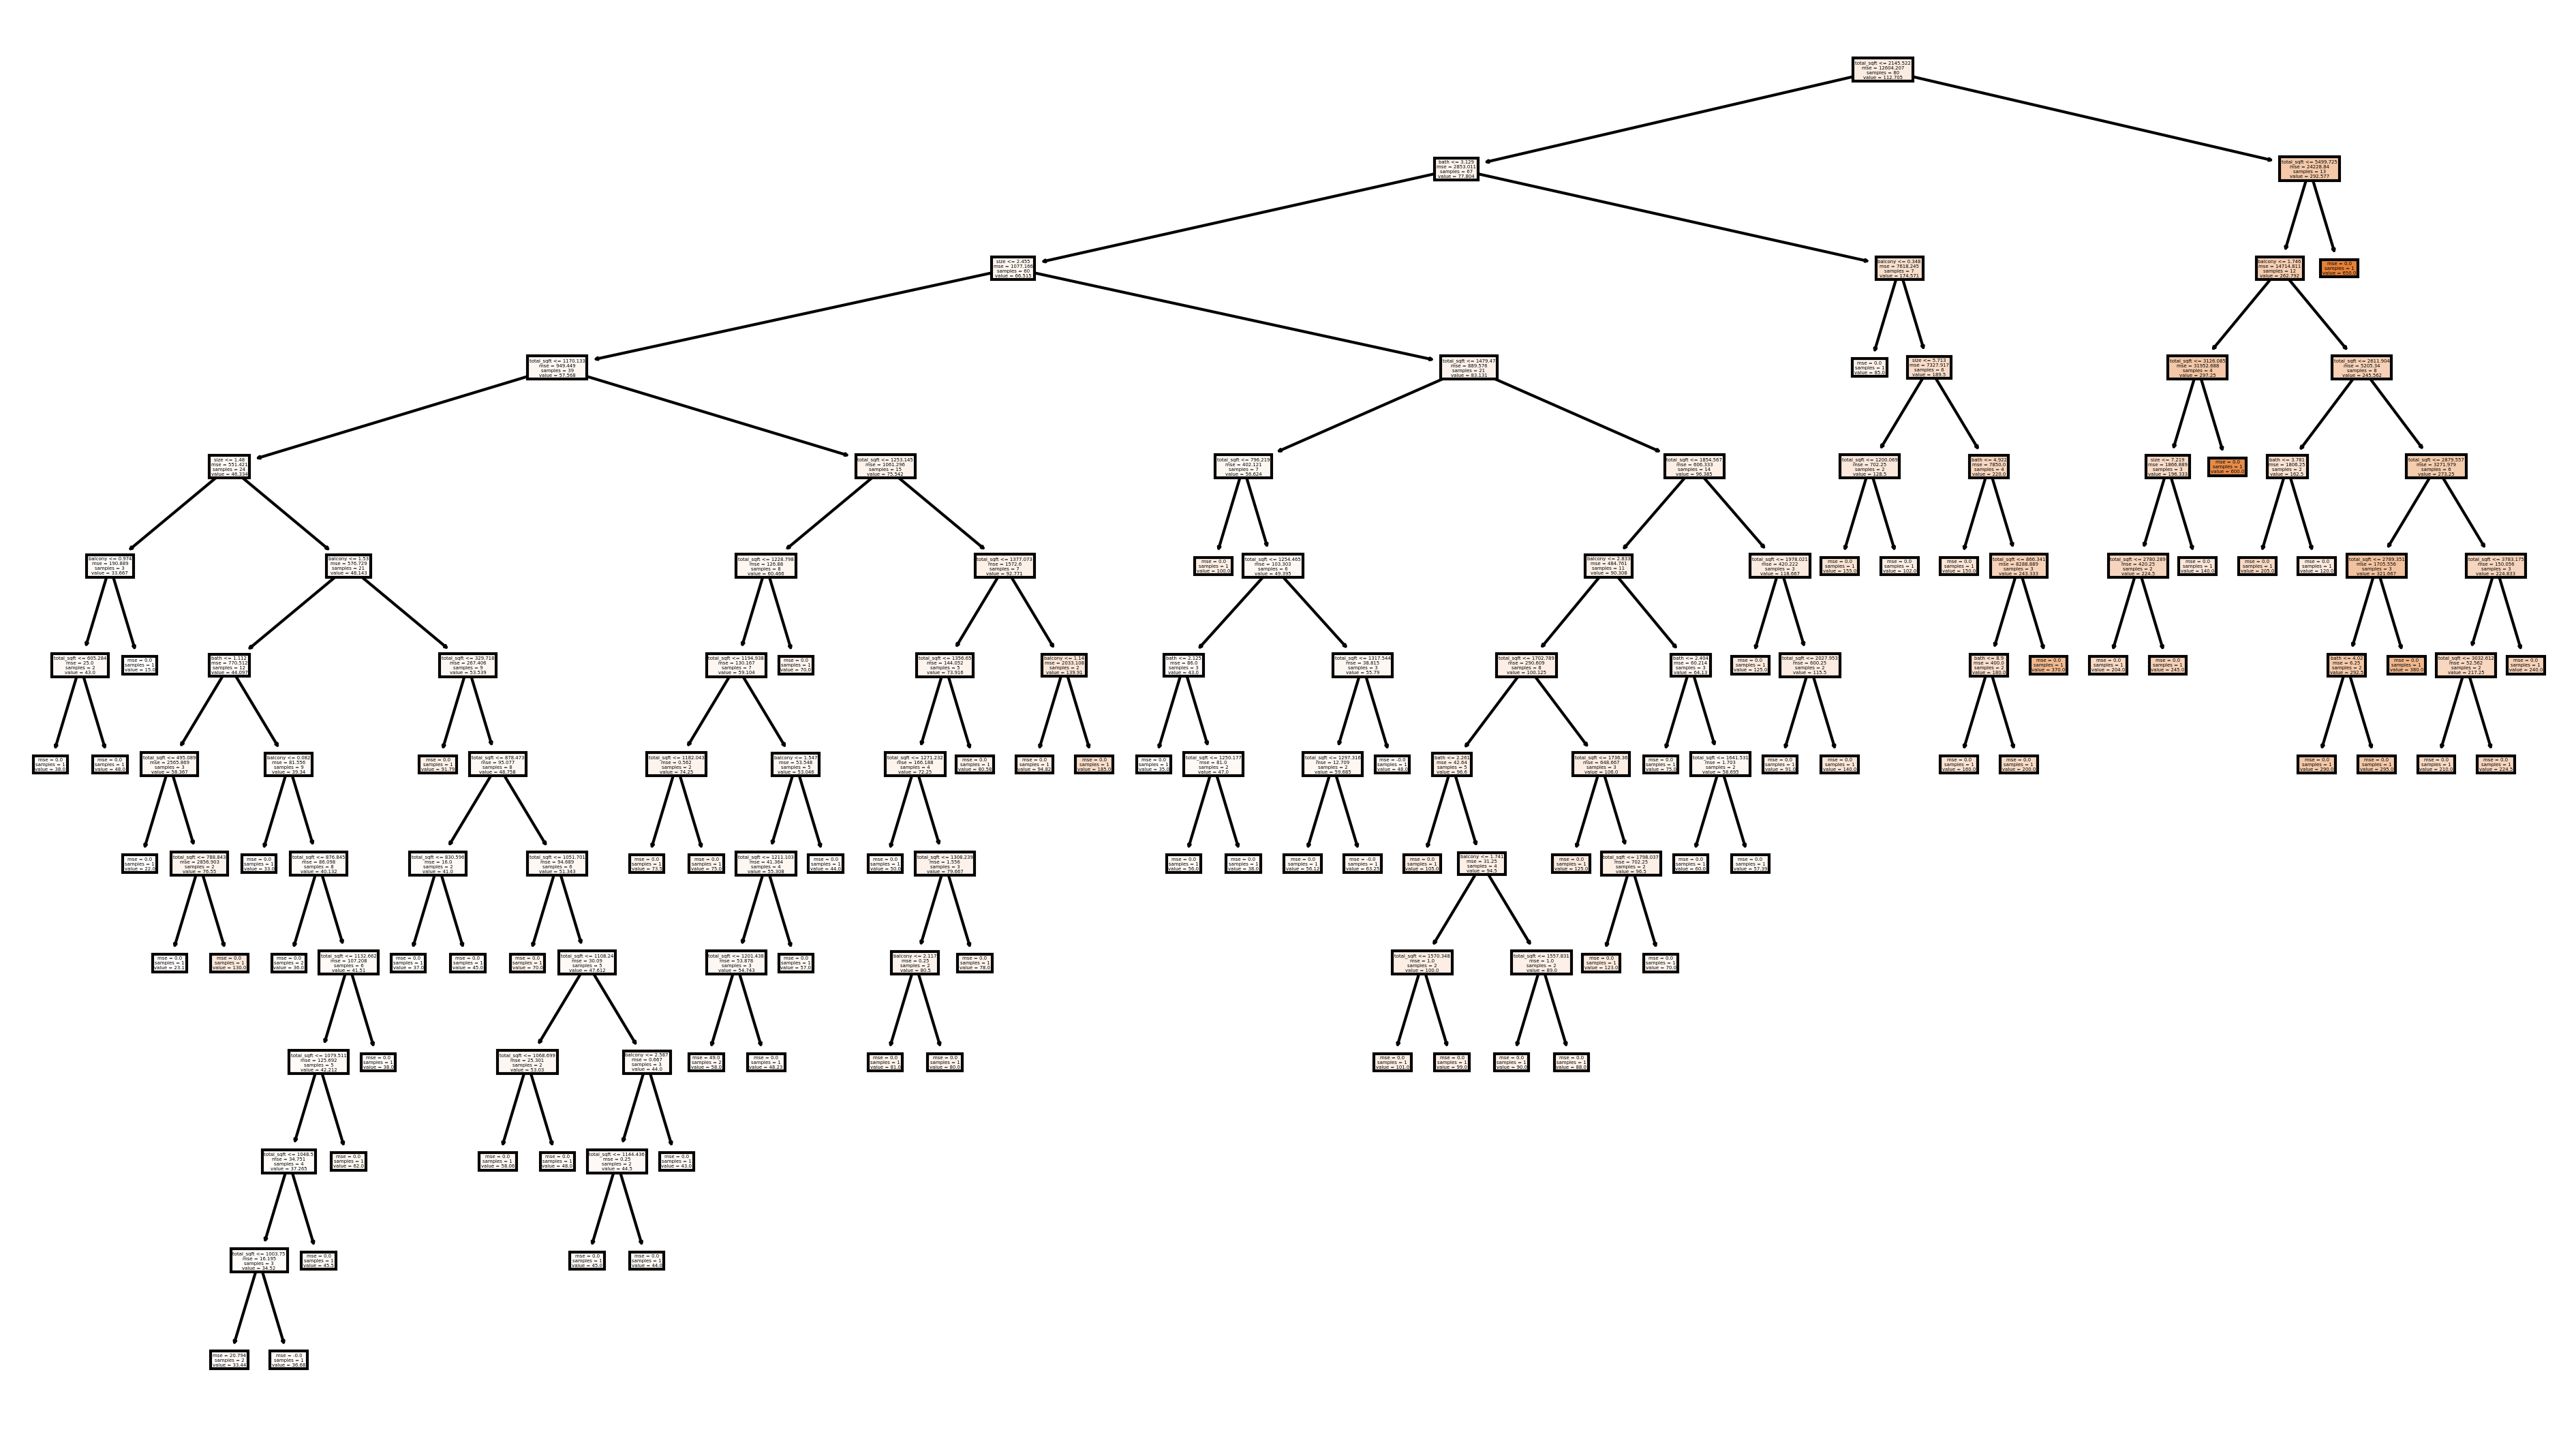

In [77]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (16,9), dpi=300)

tree.plot_tree(FinalModel,
           feature_names = x_train.columns, 
           filled = True);
# Saving your plot if you want
fig.savefig('DT.jpg')